In [3]:

import pandas as pd
df=pd.read_csv("Downloads/tvmarketing.csv")

print(df.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [1]:


import pandas as pd
df=pd.read_csv("Downloads/tvmarketing.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None


In [2]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 200
Number of columns: 2


In [3]:
print("Summary Statistics for Numerical Variables:")
print(df.describe())

Summary Statistics for Numerical Variables:
               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


In [4]:
print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.model_selection import train_test_split
x=df[['TV']]
y=df[['Sales']]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)
print(X_train,X_test,Y_train,Y_test)

        TV
17   281.4
1     44.5
35   290.7
153  171.3
69   216.8
..     ...
52   216.4
147  243.2
28   248.8
81   239.8
50   199.8

[140 rows x 1 columns]         TV
197  177.0
123  123.1
38    43.1
143  104.6
94   107.4
48   227.2
66    31.5
95   163.3
9    199.8
132    8.4
193  166.8
79   116.0
89   109.8
141  193.7
184  253.8
182   56.2
101  296.4
18    69.2
194  149.7
159  131.7
152  197.6
22    13.2
31   112.9
121   18.8
175  276.9
148   38.0
82    75.3
88    88.3
76    27.5
111  241.7
26   142.9
71   109.8
36   266.9
84   213.5
11   214.7
189   18.7
87   110.7
180  156.6
29    70.6
7    120.2
113  209.6
60    53.5
72    26.8
12    23.8
188  286.0
39   228.0
136   25.6
171  164.5
165  234.5
145  140.3
106   25.0
19   147.3
163  163.5
14   204.1
119   19.4
158   11.7
112  175.7
186  139.5
102  280.2
85   193.2      Sales
17    24.4
1     10.4
35    12.8
153   19.0
69    22.3
..     ...
52    22.6
147   25.4
28    18.9
81    12.3
50    11.4

[140 rows x 1 columns]      Sales
197   

In [7]:
print("shape of the X_train",X_train.shape)
print("shape of the Y_train",Y_train.shape)
print("shape of the X_test",X_test.shape)
print("shape of the Y_test",Y_test.shape)

shape of the X_train (140, 1)
shape of the Y_train (140, 1)
shape of the X_test (60, 1)
shape of the Y_test (60, 1)


In [8]:
import numpy as np

# Add a column of ones to X_train for the intercept term
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias (intercept) term

# Convert to numpy arrays (if not already)
X_b = np.array(X_b)
y_train_np = np.array(Y_train)

# Compute theta (coefficients) using the Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train_np)

# Print coefficients
print("Intercept:", theta[0][0])  # First value is the intercept
print("Coefficient for TV:", theta[1][0])  # Second value is the coefficient for 'TV'


Intercept: 7.088173725293524
Coefficient for TV: 0.04684841209271579


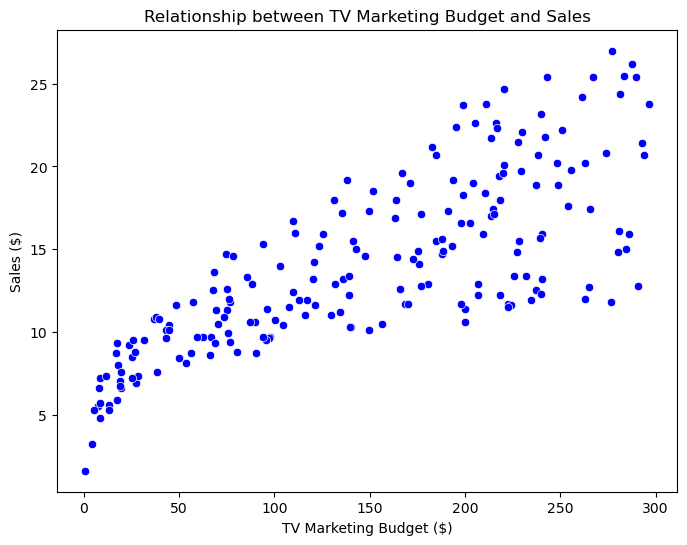

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['TV'], y=df['Sales'], color='blue')

# Labels and title
plt.xlabel("TV Marketing Budget ($)")
plt.ylabel("Sales ($)")
plt.title("Relationship between TV Marketing Budget and Sales")

# Show the plot
plt.show()


In [10]:
import numpy as np

# Add a column of ones to X_test for the intercept term
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Adding bias column

# Make predictions
y_pred = X_test_b.dot(theta)  # Using the equation y = θ0 + θ1*X

# Print Predictions
print("Predicted Sales values:\n", y_pred[:5])  # Display first 5 predictions


Predicted Sales values:
 [[15.38034267]
 [12.85521325]
 [ 9.10734029]
 [11.98851763]
 [12.11969318]]


In [11]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model using X_train and y_train
model.fit(X_train, Y_train)

# Print the coefficients
print("Intercept:", model.intercept_[0])  # Bias (theta_0)
print("Coefficient for TV:", model.coef_[0][0])  # Slope (theta_1)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print first 5 predicted values
print("First 5 Predicted Sales values:\n", y_pred[:5])


Intercept: 7.088173725293531
Coefficient for TV: 0.046848412092715855
First 5 Predicted Sales values:
 [[15.38034267]
 [12.85521325]
 [ 9.10734029]
 [11.98851763]
 [12.11969318]]


In [12]:
# Print the intercept
print("Intercept (Theta_0):", model.intercept_[0])

# Print the coefficient (slope)
print("Coefficient for TV (Theta_1):", model.coef_[0][0])


Intercept (Theta_0): 7.088173725293531
Coefficient for TV (Theta_1): 0.046848412092715855


In [13]:
print("first 5 predicted sales values",y_pred[:5])

first 5 predicted sales values [[15.38034267]
 [12.85521325]
 [ 9.10734029]
 [11.98851763]
 [12.11969318]]


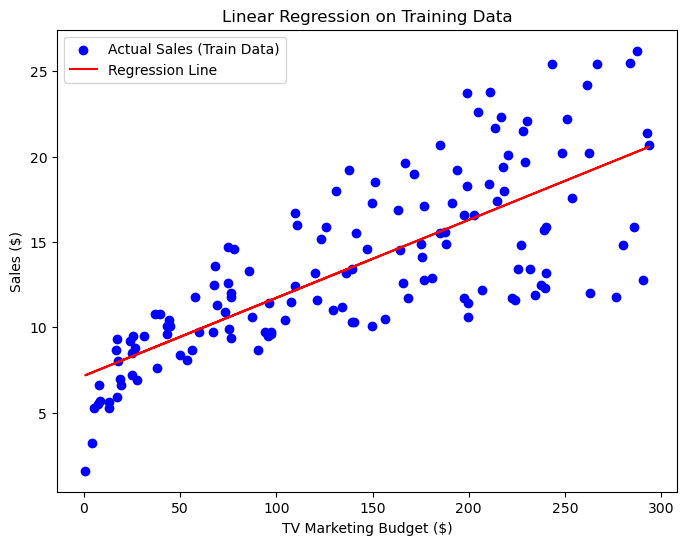

In [33]:
import matplotlib.pyplot as plt

# Predict values for training data
y_train_pred = model.predict(X_train)

# Plot training data points
plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, color='blue', label="Actual Sales (Train Data)")

# Plot regression line
plt.plot(X_train, y_train_pred, color='red', label="Regression Line")

# Labels and title
plt.xlabel("TV Marketing Budget ($)")
plt.ylabel("Sales ($)")
plt.title("Linear Regression on Training Data")
plt.legend()

# Show the plot
plt.show()


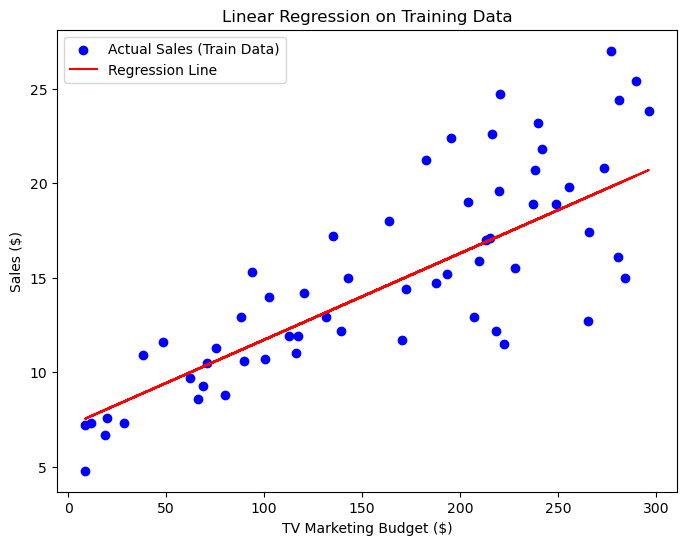

In [34]:
import matplotlib.pyplot as plt

# Predict values for training data
y_test_pred = model.predict(X_test)

# Plot training data points
plt.figure(figsize=(8,6))
plt.scatter(X_test, Y_test, color='blue', label="Actual Sales (Train Data)")

# Plot regression line
plt.plot(X_test, y_test_pred, color='red', label="Regression Line")

# Labels and title
plt.xlabel("TV Marketing Budget ($)")
plt.ylabel("Sales ($)")
plt.title("Linear Regression on Training Data")
plt.legend()

# Show the plot
plt.show()


In [7]:
# Check if y_test and y_pred exist
if 'Y_test' not in locals():
    print("Error: y_test is not defined. Make sure your data is split properly.")

if 'y_pred' not in locals():
    print("Error: y_pred is not defined. Make sure your model has made predictions.")

# If y_pred is missing, generate it using the trained model
try:
    y_pred = model.predict(X_test)  # Generate predictions
    print("y_pred successfully generated!")
except NameError:
    print("Error: Model is not defined. Ensure you trained the model before making predictions.")


Error: y_pred is not defined. Make sure your model has made predictions.
Error: Model is not defined. Ensure you trained the model before making predictions.


In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Ensure correct shape
y_test = np.array(Y_test).flatten()
y_pred = np.array(y_pred).flatten()

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute R² Score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 11.129155207082153
R² Score: 0.5454116397943674


In [16]:
import numpy as np

# Sample Data (Replace with your actual values)
y_test = np.array(Y_test)  # Convert y_test to NumPy array
y_pred = np.array(y_pred)  # Convert y_pred to NumPy array

# Step 1: Compute SS_res (Sum of Squared Residuals)
ss_res = np.sum((y_test - y_pred) ** 2)

# Step 2: Compute SS_tot (Total Sum of Squares)
y_mean = np.mean(y_test)  # Mean of y_test
ss_tot = np.sum((y_test - y_mean) ** 2)

# Step 3: Compute R Squared (R²)
r_squared = 1 - (ss_res / ss_tot)

# Step 4: Compute Adjusted R Squared
n = len(y_test)  # Number of samples
p = X_test.shape[1]  # Number of features in X_test
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# Print Results
print("R Squared (R²):", r_squared)
print("Adjusted R Squared (R² Adjusted):", adjusted_r_squared)


R Squared (R²): -103.57015482650284
Adjusted R Squared (R² Adjusted): -105.37308853040807
